<a href="https://www.kaggle.com/code/avd1729/drug-resistance-classification?scriptVersionId=128416329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv("/kaggle/input/taxol-drug-resistance-cell-lines-in-breast-cancer/Dataset.csv")
df = pd.DataFrame(data)

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_20/3021688452.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
profile.to_file('eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21312 entries, 0 to 21311
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gene.symbol  21312 non-null  object 
 1   P.Value      21312 non-null  float64
 2   logFC        21312 non-null  float64
 3   Cell Line    21312 non-null  object 
dtypes: float64(2), object(2)
memory usage: 666.1+ KB


In [6]:
data['Gene.symbol'].unique()

array(['EDIL3', 'IGFBP7', 'TFPI', ..., 'PLCB4',
       'SPANXA2///SPANXC///SPANXA1', 'SPANXB1'], dtype=object)

In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[['Gene.symbol']] = encoder.fit_transform(data[['Gene.symbol']])

In [8]:
data.head()

,Gene.symbol,P.Value,logFC,Cell Line
0,3061.0,2.350000e-18,-6.356883,BAS
1,4932.0,2.230000e-19,-6.302001,BAS
2,11118.0,3.480000e-17,-5.950269,BAS
3,2028.0,4.550000e-19,-5.599057,BAS
4,448.0,2.650000e-18,-5.415740,BAS


In [9]:
data.describe()

,Gene.symbol,P.Value,logFC
count,21312.000000,2.131200e+04,21312.000000
mean,6475.520739,1.133600e-02,0.017073
std,3733.827311,1.409163e-02,0.857761
min,0.000000,2.230000e-19,-6.356883
25%,3225.750000,2.427500e-04,-0.496397
50%,6457.000000,4.330000e-03,0.267810
75%,9711.250000,1.940000e-02,0.508133
max,12950.000000,4.990000e-02,8.400665


In [10]:
X = data.drop(['Cell Line'] , axis=1)
y = data['Cell Line']

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [12]:
import lightgbm as lgb
import catboost as cat
import xgboost as xgb
#clf = lgb.LGBMClassifier()
#clf = xgb.XGBClassifier()
clf = cat.CatBoostClassifier()


In [13]:
clf.fit(X_train, y_train)

Learning rate set to 0.091441
0:	learn: 1.3275696	total: 65.8ms	remaining: 1m 5s
1:	learn: 1.2766993	total: 73.3ms	remaining: 36.6s
2:	learn: 1.2373500	total: 80.5ms	remaining: 26.7s
3:	learn: 1.2083449	total: 87ms	remaining: 21.7s
4:	learn: 1.1750536	total: 93.8ms	remaining: 18.7s
5:	learn: 1.1492501	total: 103ms	remaining: 17.1s
6:	learn: 1.1248358	total: 111ms	remaining: 15.8s
7:	learn: 1.1001912	total: 118ms	remaining: 14.7s
8:	learn: 1.0845728	total: 125ms	remaining: 13.8s
9:	learn: 1.0684957	total: 133ms	remaining: 13.1s
10:	learn: 1.0560489	total: 139ms	remaining: 12.5s
11:	learn: 1.0443896	total: 146ms	remaining: 12s
12:	learn: 1.0273295	total: 154ms	remaining: 11.7s
13:	learn: 1.0141635	total: 161ms	remaining: 11.3s
14:	learn: 1.0040136	total: 168ms	remaining: 11s
15:	learn: 0.9952077	total: 175ms	remaining: 10.8s
16:	learn: 0.9874220	total: 182ms	remaining: 10.5s
17:	learn: 0.9750331	total: 192ms	remaining: 10.5s
18:	learn: 0.9635443	total: 199ms	remaining: 10.3s
19:	learn: 0

In [14]:
y_pred = clf.predict(X_test)

In [15]:
#clf._check_feature_names for lgbm

In [16]:
from sklearn import metrics

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         BAS       0.65      0.84      0.73      1237
      HS578T       0.64      0.60      0.62       797
        MCF7       0.93      0.72      0.81      1299
         MDA       0.78      0.76      0.77       930

    accuracy                           0.74      4263
   macro avg       0.75      0.73      0.73      4263
weighted avg       0.76      0.74      0.74      4263



In [18]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy of the model: {0}%'.format(acc))

Accuracy of the model: 74.03237156931738%


<AxesSubplot: >

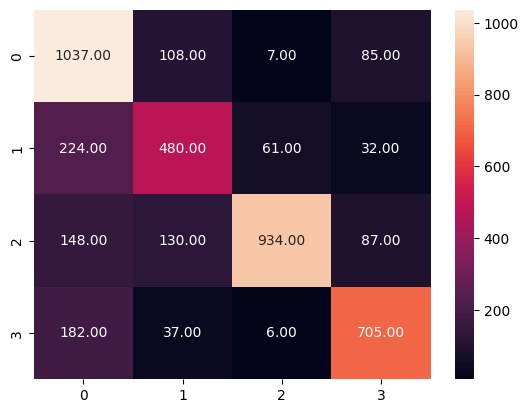

In [19]:
import seaborn as sn
cm = metrics.confusion_matrix(y_test , y_pred)
sn.heatmap(cm , annot=True , fmt='.2f')